## Importing Libraries

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [2]:
data_1 = pd.read_csv("E:/upcche.csv")
data_2 = pd.read_csv("E:/wche.csv")
print(data_1.shape)
print(data_2.shape)

(667, 6)
(9427395, 11)


## UPC Dataset (Data_1)

### Data Exploration

In [3]:
print('Length of Dataset: ', data_1.shape[0])
print('Number of Attributes: ', data_1.shape[1])

Length of Dataset:  667
Number of Attributes:  6


In [4]:
data_1.head()

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM
0,153,1570077445,CTY LN COLBY MILD,10 OZ,12,5390551
1,153,1570077446,CTY LN CHEDDAR MILD,10 OZ,12,5390571
2,153,1570077454,CTY LN CHEDDAR MED/S,8 OZ,12,5390591
3,153,1570077455,CTY LN CHEDDAR SHARP,8 OZ,12,5390511
4,153,1570077456,CTY LN SWISS OLD WOR,10 OZ,12,5390531


In [5]:
data_1['DESCRIP'].value_counts()

LC SHIPPER/WEDGE-COM    4
DOM SHREDDED MOZZARE    4
KR AMERICAN SINGLES     4
DOM SHREDDED MILD CH    4
KRAFT CRACKER BARREL    4
                       ..
KR SPREADERY RANCH      1
KR SPREADERY MLD MEX    1
KR SPREADERY PORT WI    1
KR SPREADERY MED CHE    1
CF RW 10# SWISS         1
Name: DESCRIP, Length: 575, dtype: int64

In [6]:
# Checking unique values in description column.
data_1['DESCRIP'].nunique()

575

In [7]:
data_1.dtypes

COM_CODE     int64
UPC          int64
DESCRIP     object
SIZE        object
CASE         int64
NITEM        int64
dtype: object

In [8]:
data_1.describe()

,COM_CODE,UPC,CASE,NITEM
count,667.000000,6.670000e+02,667.000000,6.670000e+02
mean,154.178411,5.250123e+09,15.215892,5.678937e+06
std,3.842970,6.896628e+09,16.502658,1.551845e+06
min,61.000000,1.570077e+09,1.000000,5.303450e+05
25%,153.000000,2.100062e+09,12.000000,5.352016e+06
50%,154.000000,3.828153e+09,12.000000,5.375101e+06
75%,155.000000,7.015329e+09,12.000000,5.397111e+06
max,157.000000,7.353758e+10,288.000000,9.898980e+06


In [9]:
data_1.head(10)

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM
0,153,1570077445,CTY LN COLBY MILD,10 OZ,12,5390551
1,153,1570077446,CTY LN CHEDDAR MILD,10 OZ,12,5390571
2,153,1570077454,CTY LN CHEDDAR MED/S,8 OZ,12,5390591
3,153,1570077455,CTY LN CHEDDAR SHARP,8 OZ,12,5390511
4,153,1570077456,CTY LN SWISS OLD WOR,10 OZ,12,5390531
5,153,1570077458,COUNTY LINE/COLBY JA,10 OZ,12,5390621
6,153,1570077501,CTY LN MONTEREY JACK,10 OZ,12,5390491
7,153,1570077503,~COUNTY LINE MUENSTE,8 OZ,12,5390441
8,153,1570077507,~COUNTY LINE MOZZ CH,8 OZ,12,5390421
9,153,1570077508,COUNTY LINE EXTRA SH,8 OZ,12,5390401


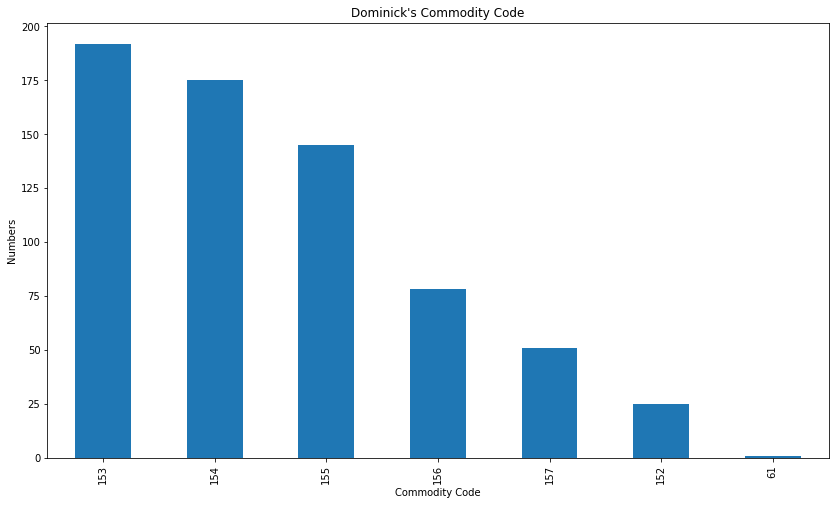

In [10]:
import matplotlib.pyplot as plt
ax = data_1['COM_CODE'].value_counts().plot(kind='bar', figsize=(14,8), title="Dominick's Commodity Code")
ax.set_xlabel("Commodity Code")
ax.set_ylabel("Numbers")
plt.show()

## Cleaning Dataset

### 1- Removing Inconsistencies from dataset

In [11]:
#cleaning description by removing inconsistencies.

data_1['DESCRIP'] = data_1['DESCRIP'].str.replace('#','')
data_1['DESCRIP'] = data_1['DESCRIP'].str.replace('.','')
data_1['DESCRIP'] = data_1['DESCRIP'].str.replace('~','')
data_1['DESCRIP'] = data_1['DESCRIP'].str.replace('$','')
data_1['DESCRIP'] = data_1['DESCRIP'].str.replace('*','')
data_1['DESCRIP'] = data_1['DESCRIP'].str.replace('\s\d+:\d+:\d+[^a-c6]\d+$', '', regex= True)

In [12]:
#cleaning Size column by removing inconsistencies.

data_1['SIZE'] = data_1['SIZE'].str.replace(' ','')
data_1['SIZE'] = data_1['SIZE'].str.replace('OZ', '')
data_1['SIZE'] = data_1['SIZE'].str.replace('LB','')
data_1['SIZE'] = data_1['SIZE'].str.replace('CT','')
data_1['SIZE'] = data_1['SIZE'].str.rstrip('.')
data_1['SIZE'] = data_1['SIZE'].str.replace('MUENST','1')
data_1['SIZE'] = data_1['SIZE'].str.replace('TO','-')
data_1['SIZE'] = data_1['SIZE'].str.replace('#','')

In [13]:
#Adding OZ at the end of evry value.

data_1['SIZE'] = data_1['SIZE'].astype(str) + ' OZ'

In [14]:
data_1.tail(50)

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM
617,154,7881200830,MILLERS STRING CHEES,4 OZ,12,5375060
618,155,7881200885,MILLERS AMER SLCD YE,3 OZ,3,9824440
619,154,7881200910,MILLERS SHRED MOZZER,8 OZ,12,5375070
620,155,7881207202,MLRS LO SOD/LO FAT S,6 OZ,12,5375050
621,156,7881207805,MILLERS LO SALT GOUD,7.0 OZ,12,5375130
622,156,7881208328,MILLERS HRB-GRLC YOG,6 OZ,12,5375090
623,154,7881208350,MLR KSR CHS SLYOGUR,6 OZ,12,9824200
624,154,7881209725,MILLERS WHITE AMERIC,12 OZ,12,5375030
625,155,7881209885,MILLERS AMER SLCD WH,3 OZ,3,9824450
626,154,7881231400,MILLER'S SL AMERICAN,8 OZ,12,9822940


### 2- Dropping Duplicates Values

In [15]:
#Dropping Duplicate Data.

data_1 = data_1.drop_duplicates()

In [16]:
#Checking for Null Values.

data_1.isnull().sum()

COM_CODE    0
UPC         0
DESCRIP     0
SIZE        0
CASE        0
NITEM       0
dtype: int64

In [17]:
# Dropping NITEM and CASE column because itS Irrelevant with respect to our analysis.

data_1.drop('NITEM',axis=1,inplace=True)
data_1.drop('CASE',axis=1,inplace=True)

## Movement File Dataset

### Exploring Dataset

In [18]:
print('Length of Dataset: ', data_2.shape[0])
print('Number of Attributes: ', data_2.shape[1])

Length of Dataset:  9427395
Number of Attributes:  11


In [19]:
data_2.head()

,STORE,UPC,WEEK,MOVE,QTY,PRICE,SALE,PROFIT,OK,PRICE_HEX,PROFIT_HEX
0,2,1570077445,1,7,1,2.41,NaN,37.59,1,400347AE147AE148,4042CB851EB851EC
1,2,1570077445,2,8,1,2.41,NaN,37.59,1,400347AE147AE148,4042CB851EB851EC
2,2,1570077445,3,4,1,2.41,NaN,37.14,1,400347AE147AE148,404291EB851EB852
3,2,1570077445,4,8,1,2.41,NaN,37.14,1,400347AE147AE148,404291EB851EB852
4,2,1570077445,5,7,1,2.41,NaN,37.14,1,400347AE147AE148,404291EB851EB852


In [20]:
# Checking for Statistical Values
data_2.describe()

,STORE,UPC,WEEK,MOVE,QTY,PRICE,PROFIT,OK
count,9.427395e+06,9.427395e+06,9.427395e+06,9.427395e+06,9.427395e+06,9.427395e+06,9.427395e+06,9.427395e+06
mean,8.314349e+01,5.056841e+09,2.071832e+02,1.285234e+01,1.010518e+00,1.747885e+00,2.454604e+01,9.812749e-01
std,3.666413e+01,5.951959e+09,1.135027e+02,5.055493e+01,1.382372e-01,1.443297e+00,1.758442e+01,1.355525e-01
min,2.000000e+00,1.570077e+09,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-9.976000e+01,0.000000e+00
25%,5.400000e+01,2.100062e+09,1.110000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,8.900000e+01,3.828153e+09,2.090000e+02,5.000000e+00,1.000000e+00,1.890000e+00,2.941000e+01,1.000000e+00
75%,1.130000e+02,4.610000e+09,3.060000e+02,1.300000e+01,1.000000e+00,2.600000e+00,3.761000e+01,1.000000e+00
max,1.460000e+02,7.353758e+10,3.990000e+02,1.817600e+04,7.000000e+00,1.113300e+02,9.999000e+01,1.000000e+00


In [21]:
data_2.dtypes

STORE           int64
UPC             int64
WEEK            int64
MOVE            int64
QTY             int64
PRICE         float64
SALE           object
PROFIT        float64
OK              int64
PRICE_HEX      object
PROFIT_HEX     object
dtype: object

In [22]:
#Checking for Null Values.

data_2.isnull().sum()

STORE               0
UPC                 0
WEEK                0
MOVE                0
QTY                 0
PRICE               0
SALE          8067719
PROFIT              0
OK                  0
PRICE_HEX           0
PROFIT_HEX          0
dtype: int64

### Transforming Dataset

#### Dropping Columns

In [23]:
# Dropping Sale column because it contain too many null vaues. so its better that drop this coumn.

data_2.drop('SALE',axis=1,inplace=True)

In [24]:
# Dropping Columns 'Price_HEX' and 'Profit_HEX' because it dont have much impact.

data_2.drop('PRICE_HEX',axis=1,inplace=True)
data_2.drop('PROFIT_HEX',axis=1,inplace=True)

#### Adding Total Sales Column

In [25]:
# Computing Sales and creating new column of Total Sales.

data_2['Total_Sales'] = data_2['PRICE']*data_2['MOVE']/data_2['QTY']

In [26]:
data_2.head()

,STORE,UPC,WEEK,MOVE,QTY,PRICE,PROFIT,OK,Total_Sales
0,2,1570077445,1,7,1,2.41,37.59,1,16.87
1,2,1570077445,2,8,1,2.41,37.59,1,19.28
2,2,1570077445,3,4,1,2.41,37.14,1,9.64
3,2,1570077445,4,8,1,2.41,37.14,1,19.28
4,2,1570077445,5,7,1,2.41,37.14,1,16.87


## Statistical Data Analysis

In [27]:
# Grouping profit with respect to weeks.
weekly_profit = data_2.groupby(['WEEK', 'PROFIT'])
  
# Print the first value in each group
weekly_profit.first()

STORE          UPC  MOVE  QTY     PRICE  OK  Total_Sales
WEEK PROFIT                                                          
1    0.00        5   1570077445     0    1  0.000000   1         0.00
     6.07        8   2100061161    96    1  3.890000   1       373.44
     11.97      21   2100000014    41    1  1.170000   1        47.97
     13.71      21   2100061526    60    1  2.290000   1       137.40
     14.83       2   2100061161    16    1  4.290000   1        68.64
...            ...          ...   ...  ...       ...  ..          ...
399  66.64      28  26522800000     9    1  3.192222   1        28.73
     66.65      56  26522800000    12    1  3.112500   1        37.35
     66.66      80  26522800000    20    1  3.234000   1        64.68
     66.68     110  26522800000    11    1  3.199091   1        35.19
     66.72     146  26522800000     7    1  3.178571   1        22.25

[628857 rows x 7 columns]

In [28]:
# Count of sales from every store.
sales_by_store = data_2.groupby("STORE")["Total_Sales"].count()
sales_by_store.head(10)

STORE
2     108935
5     111695
8     111037
9     111710
12    112391
14    111933
18    110013
21    110651
28    110424
32    109674
Name: Total_Sales, dtype: int64

In [29]:
# Weekly sales from each stores.

WEEKLY_sales_by_store = data_2.groupby(["WEEK","STORE"])["Total_Sales"].count()
WEEKLY_sales_by_store.head(10)

WEEK  STORE
1     2        235
      5        244
      8        252
      9        246
      12       247
      14       252
      18       239
      21       249
      28       249
      32       245
Name: Total_Sales, dtype: int64

In [30]:
# Products with Maximam Profits

Profit_per_upc = data_2.groupby("UPC")["PROFIT"].max().sort_values(ascending=False)
Profit_per_upc.head(10)

UPC
7027207414    99.99
2100061999    99.69
4530007180    99.48
2100061223    99.47
7027224105    98.49
1570077446    97.34
2100000156    96.48
1570077456    95.50
1570077501    95.02
7027202012    93.85
Name: PROFIT, dtype: float64

In [31]:
# Stores with maximam weekly profits.
Profit_per_upc = data_2.groupby(["STORE","WEEK"])["Total_Sales"].max().sort_values(ascending=False)
Profit_per_upc.head(5)

STORE  WEEK
126    323     299002.56
80     323     199685.04
112    323     199280.70
121    323     101247.66
89     323     100638.63
Name: Total_Sales, dtype: float64

In [32]:
# Stores which sold maximam products in a week.
Profit_per_upc = data_2.groupby(["STORE","WEEK"])["MOVE"].max().sort_values(ascending=False)
Profit_per_upc.head(5)

STORE  WEEK
64     30      18176
44     13      17152
74     223      9446
73     223      8214
98     223      7557
Name: MOVE, dtype: int64

In [33]:
# Product with High Prices.
Profit_per_upc = data_2.groupby("UPC")["PRICE"].max().sort_values(ascending=False)
Profit_per_upc.head()

UPC
2100061223     111.33
26527200000     46.08
26537200000     31.17
26513700000     26.03
5300000778      24.80
Name: PRICE, dtype: float64

In [34]:
# Stores with Maximam Profits.
Profit_per_upc = data_2.groupby("STORE")["PROFIT"].max().sort_values(ascending=False)
Profit_per_upc.head()

STORE
92     99.99
67     99.99
70     99.99
113    99.99
72     99.99
Name: PROFIT, dtype: float64

## Combining Datasets

In [35]:
merged_data = pd.merge(left=data_1, right=data_2, how='outer', left_on='UPC', right_on='UPC')

In [36]:
merged_data.head()

,COM_CODE,UPC,DESCRIP,SIZE,STORE,WEEK,MOVE,QTY,PRICE,PROFIT,OK,Total_Sales
0,153,1570077445,CTY LN COLBY MILD,10 OZ,2,1,7,1,2.41,37.59,1,16.87
1,153,1570077445,CTY LN COLBY MILD,10 OZ,2,2,8,1,2.41,37.59,1,19.28
2,153,1570077445,CTY LN COLBY MILD,10 OZ,2,3,4,1,2.41,37.14,1,9.64
3,153,1570077445,CTY LN COLBY MILD,10 OZ,2,4,8,1,2.41,37.14,1,19.28
4,153,1570077445,CTY LN COLBY MILD,10 OZ,2,5,7,1,2.41,37.14,1,16.87


In [37]:
Profit_per_product = merged_data.groupby(["DESCRIP","UPC"])["PROFIT"].max().sort_values(ascending=False)
Profit_per_product.head(5)

DESCRIP               UPC       
CTY LN SHREDDED CHED  7027207414    99.99
KR REDUCE FAT AMER S  2100061999    99.69
TREASURE CAVE SQUARE  4530007180    99.48
KR PHILA CREAM CHEES  2100061223    99.47
HC CREAM CHEESE BRI   7027224105    98.49
Name: PROFIT, dtype: float64

In [38]:
# Stores with Maximam Profits.
sales_per_product_size = merged_data.groupby(["DESCRIP","SIZE"])["Total_Sales"].max().sort_values(ascending=False)
sales_per_product_size.head(3)

DESCRIP               SIZE 
KR PHILA CREAM CHEES  8 OZ     299002.56
KR AMERICAN SINGLES   16 OZ     56087.04
KR GRTD PARMESAN      8 OZ      44584.96
Name: Total_Sales, dtype: float64

In [39]:
Price_per_product = merged_data.groupby(["DESCRIP","UPC"])["PRICE"].max().sort_values(ascending=False)
Price_per_product.head(5)

DESCRIP               UPC        
KR PHILA CREAM CHEES  2100061223     111.33
DOM SWISS CHUNCK      26527200000     46.08
DOM DANISH HAVARTI C  26537200000     31.17
DOM COLBY CHUNCK      26513700000     26.03
BORDEN SHARP FAT FRE  5300000778      24.80
Name: PRICE, dtype: float64

In [40]:
per_product = merged_data.groupby(["STORE","WEEK"])["MOVE"].max().sort_values(ascending=False)
per_product.head(5)

STORE  WEEK
64     30      18176
44     13      17152
74     223      9446
73     223      8214
98     223      7557
Name: MOVE, dtype: int64

In [41]:
product = merged_data.groupby(["DESCRIP","UPC"])["MOVE"].max().sort_values(ascending=False)
product.head(5)

DESCRIP               UPC       
DOM AMER SNGL CHS FO  3828153029    18176
KR AMERICAN SINGLES   2100061526    17152
HH CREAM CHEESE       3828153085    15872
KR SHREDDED COLBY/JA  2100063235    15872
DOM AMER SNGL CHS SP  3828153045    15616
Name: MOVE, dtype: int64

In [42]:
Profit_per_com = merged_data.groupby("COM_CODE")["PROFIT"].max().sort_values(ascending=False)
Profit_per_com.head(10)

COM_CODE
154    99.99
155    99.69
156    99.48
157    99.47
153    97.34
152    84.58
61     70.16
Name: PROFIT, dtype: float64

In [43]:
Price_per_comm = merged_data.groupby("COM_CODE")["PRICE"].max().sort_values(ascending=False)
Price_per_comm.head(10)

COM_CODE
157    111.33
153     46.08
155     24.80
154      7.99
152      6.79
156      6.29
61       0.39
Name: PRICE, dtype: float64

In [44]:
sales_per_com = merged_data.groupby("COM_CODE")["Total_Sales"].max().sort_values(ascending=False)
sales_per_com.head(10)

COM_CODE
157    299002.560000
155     56087.040000
152     44584.960000
153     41333.760000
154     32537.600000
156      3754.666667
61        256.360000
Name: Total_Sales, dtype: float64